In [1]:
import pandas as pd
import preprocessing as pre

df = pre.preprocess(pd.read_csv("data/80b8403f476d5b.csv"))
df

all problem sets are disjoint: True


,problem,implementation,solver,num_txn,num_keys,num_values,num_sessions,candidates,initial_clauses,final_clauses,avg_time_ms,min_time_ms,max_time_ms,outcome,expected,frameworks,problem_type,timeout,crash
0,CC_b|CC_c,all,glucose,3,5,5,3,3,7530,8398,10,10,10,UNSAT,UNSAT,"(b, c)","(UNSAT, 2)",False,False
1,CC_b|CC_c,all,glucose,4,5,5,3,36,10738,17330,302,299,304,UNSAT,UNSAT,"(b, c)","(UNSAT, 2)",False,False
2,CC_b|CC_c,all,glucose,5,5,5,3,483,17255,88805,6788,6769,6798,UNSAT,UNSAT,"(b, c)","(UNSAT, 2)",False,False
3,CC_b|CC_c,all,glucose,6,5,5,3,-1,-1,-1,3600000,3600000,3600000,TIMEOUT,UNSAT,"(b, c)","(UNSAT, 2)",True,False
4,CC_b|CC_c,no_fixed_co,glucose,3,5,5,3,5,8329,9414,26,21,36,UNSAT,UNSAT,"(b, c)","(UNSAT, 2)",False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1607,TapRA_b|RA_b,no_smart_search,glucose,6,5,5,3,1,66645,66645,34,34,34,SAT,SAT,"(b,)","(SAT, 1)",False,False
1608,TapRA_b|RA_b,no_smart_search,glucose,7,5,5,3,1,101661,101661,54,53,57,SAT,SAT,"(b,)","(SAT, 1)",False,False
1609,TapRA_b|RA_b,no_smart_search,glucose,8,5,5,3,1,149743,149743,73,73,73,SAT,SAT,"(b,)","(SAT, 1)",False,False
1610,TapRA_b|RA_b,no_smart_search,glucose,9,5,5,3,1,208978,208978,221,219,223,SAT,SAT,"(b,)","(SAT, 1)",False,False


# Plot 2
Compare performance between Isolde and no-learning baseline. Consider only SAT problems that can be solved with up to ten transactions using the baseline.

In [2]:
import vldb

f = df[df['implementation'].isin(["all", "no_learning"])]
f = vldb.exclude_problems_that_timeout(f)
f = vldb.compute_means(f)
f

,problem_type,implementation,solver,num_txn,num_keys,num_values,num_sessions,avg_cand,min_cand,max_cand,avg_time_ms,min_time_ms,max_time_ms
0,"(SAT, 1)",all,glucose,3,5,5,3,1.500000,1,2,11,3,60
1,"(SAT, 1)",all,glucose,4,5,5,3,2.500000,1,7,16,4,40
2,"(SAT, 1)",all,glucose,5,5,5,3,2.250000,1,7,26,5,64
3,"(SAT, 1)",all,glucose,6,5,5,3,1.750000,1,6,36,7,99
4,"(SAT, 1)",all,glucose,7,5,5,3,2.125000,1,7,57,9,131
5,"(SAT, 1)",all,glucose,8,5,5,3,5.500000,1,29,146,13,566
6,"(SAT, 1)",all,glucose,9,5,5,3,1.750000,1,5,243,17,599
7,"(SAT, 1)",all,glucose,10,5,5,3,4.625000,1,27,405,20,1120
8,"(SAT, 1)",no_learning,glucose,3,5,5,3,6358.500000,1,48036,5541,3,42439
9,"(SAT, 1)",no_learning,glucose,4,5,5,3,2537.625000,1,18972,4321,4,32272


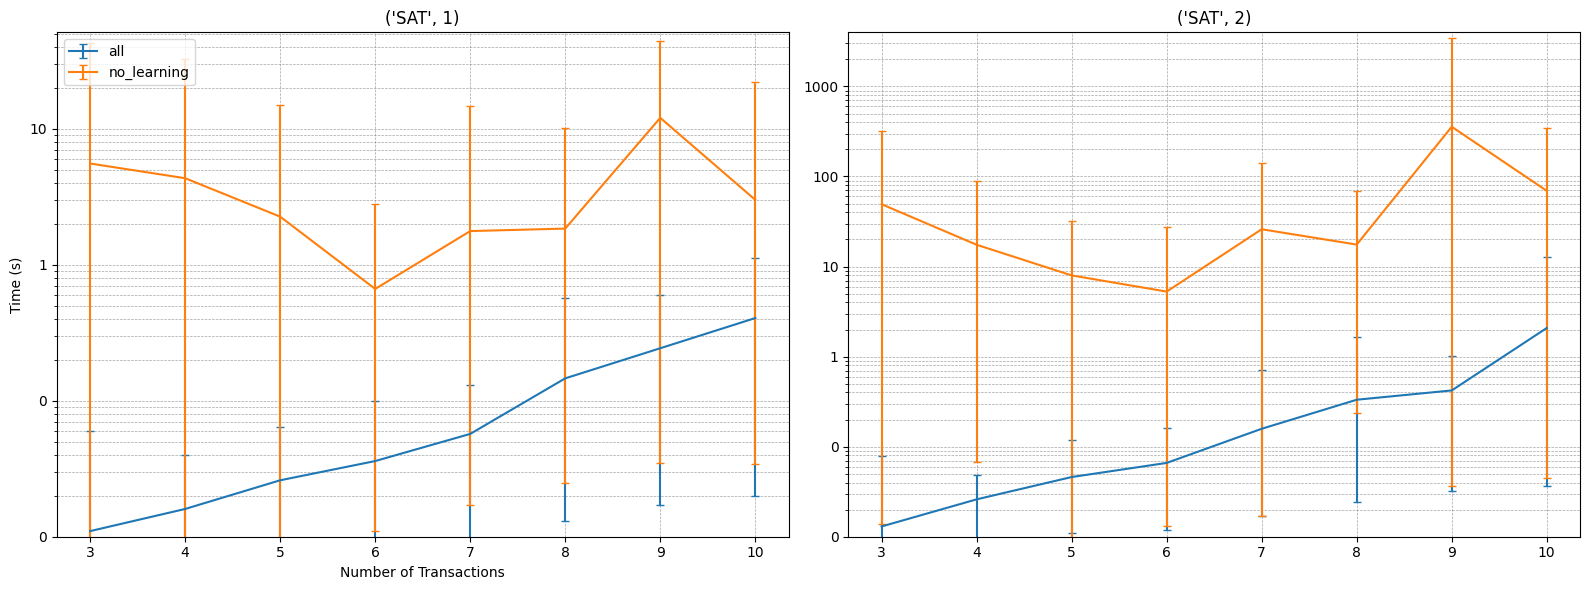

In [4]:
from plotting import plot

plot(
    f,
    'problem_type',
    'solver',
    'implementation',
    styles=None,
    logScaling=True,
    plotHeight=6,
    plotWidth=8,
    legend=True,
    y_unit="s",
    sharey=False,
)


# Plot 3
I can see three sensible options here:
1. you cap transaction numbers at 6 and 7 and plot the means for the problems that do finish successfully up until that point
2. you include problems that timeout, but timeouts are doubled
3. cactus plot 